In [42]:
from IPython.display import display, Image

In [43]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
print(np.__version__)
print(matplotlib.__version__)

1.20.1
3.3.4


In [45]:
# 설치가 안되어 있을 경우, 설치 필요.
import mglearn
import sklearn
print( sklearn.__version__)
print( mglearn.__version__)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

0.24.1
0.1.9


w[0]: 0.393906  b: -0.031804


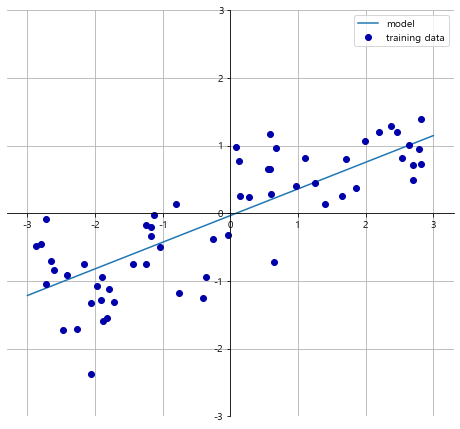

In [46]:
mglearn.plots.plot_linear_regression_wave()

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

In [48]:
boston = load_boston()
X = boston.data
y = boston.target

In [49]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

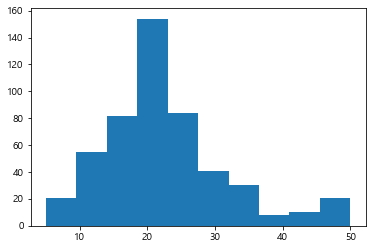

In [50]:
plt.hist(y)

In [51]:
X_train, X_test ,y_train, y_test = train_test_split(X, y,
                                                   random_state = 42)

In [52]:
## model = 모델명()
## model.fit(입력,답) #답 - 레이블
## pred = model.predict(새로운 데이터 입력)
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred[0:10]

array([28.83885359, 36.00783288, 15.08324755, 25.23090886, 18.87864064,
       23.21398327, 17.5931124 , 14.30508093, 23.05438985, 20.62008346])

In [53]:
import pandas as pd

In [54]:
dict_dat = {'실제값':y_test, '예측값':pred, '오차':y_test - pred}
dat = pd.DataFrame(dict_dat)
dat

,실제값,예측값,오차
0,23.6,28.838854,-5.238854
1,32.4,36.007833,-3.607833
2,13.6,15.083248,-1.483248
3,22.8,25.230909,-2.430909
4,16.1,18.878641,-2.778641
...,...,...,...
122,8.8,3.284209,5.515791
123,19.2,23.798796,-4.598796
124,25.3,25.733299,-0.433299
125,20.4,23.048156,-2.648156


In [55]:
dat.shape

(127, 3)

In [56]:
dat['오차제곱'] = dat['오차'] ** (2)
mse_val = dat['오차제곱'].sum() / dat.shape[0]
mse_val

22.098694827098253

In [57]:
mae_val = np.abs(dat['오차']).sum( ) / dat.shape[0]
mae_val

3.060939595437056

In [58]:
rmse_val = mse_val ** 0.5
rmse_val

4.7009248906037895

In [59]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)

22.098694827098253

In [60]:
print("학습용 데이터에 대한 결정 계수: {:.2f}".format(model.score(X_train, y_train)))
print("학습용 데이터에 대한 결정 계수: {:.2f}".format(model.score(X_test, y_test)))

학습용 데이터에 대한 결정 계수: 0.75
학습용 데이터에 대한 결정 계수: 0.68


In [63]:
## 70% : 30%
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.3,
                                                   random_state = 42)

In [64]:
model = LinearRegression()
model.fit(X_train,y_train)
tr_score =model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("학습용 : {}, 테스트용 : {}".format(tr_score, test_score))

학습용 : 0.7434997532004697, 테스트용 : 0.7112260057484929


In [68]:
## 9-1, 8-2, 7-3, 6-4, 5-5
for i in range(1,6,1):
    X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                       test_size =(i/10),
                                                       random_state =42)
    model = LinearRegression().fit(X_train, y_train)
   
    
    tr_score = model.score(X_train,y_train)
    test_score = model.score(X_test, y_test)
    print(f"학습용: {10-i}, 테스트 : {i}")
    print("학습용 :{},테스트용 : {}".format(tr_score, test_score))
    
    pred = model.predict(X_test)
    mse_val = np.sum((y_test -  pred)**2) / len(pred)
    print("mse value : {}".format(mse_val))
    rmse_val = mse_val ** 0.5
    print("rmse value : {}".format(rmse_val))

학습용: 9, 테스트 : 1
학습용 :0.7375152736886281,테스트용 : 0.7598135533532484
mse value : 14.995852876582585
rmse value : 3.8724479178657245
학습용: 8, 테스트 : 2
학습용 :0.7508856358979673,테스트용 : 0.6687594935356289
mse value : 24.29111947497374
rmse value : 4.928602182665359
학습용: 7, 테스트 : 3
학습용 :0.7434997532004697,테스트용 : 0.7112260057484929
mse value : 21.517444231177226
rmse value : 4.638689926172822
학습용: 6, 테스트 : 4
학습용 :0.747199884740759,테스트용 : 0.7125140936111221
mse value : 21.832709989577456
rmse value : 4.6725485540096265
학습용: 5, 테스트 : 5
학습용 :0.7719887864238001,테스트용 : 0.689691748287575
mse value : 25.175390536117003
rmse value : 5.017508399207419


In [70]:
import mglearn

In [73]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
import pandas as pd

In [74]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [77]:
boston = load_boston()
print(type(boston.data), type(boston.target))

df_boston = pd.DataFrame(boston.data,columns=boston.feature_names)
df_boston['price'] = pd.Series(boston.target)
df_boston.head()

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [79]:
df_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')

In [81]:
## 입력과 출력 - X, y
X = df_boston.loc[:,'CRIM':'LSTAT']
y = df_boston['price']

print(X.shape, y.shape)

(506, 13) (506,)
